In [31]:
import time
import math
import re
import pandas as pd
from textblob import TextBlob
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import string
import math
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
from collections import Counter
from gensim import corpora, models
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
%matplotlib inline
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [152]:
news_articles = 'news_chicago_il.pkl'

In [153]:
news_df = pd.read_pickle(news_articles)

In [154]:
news_df.head()

,crawled,language,text,title
0,2018-01-22T06:31:13.011+02:00,english,"Discussion in ' Midwest ' started by sportscrazed2 , Jan 21, 2018 . sportscrazed2 Aspirant (200)...",Best Stops Chicago Red Line?
1,2018-01-22T06:43:12.000+02:00,english,CHICAGO – Hundreds of ballet dancers between the ages of 9 and 19 have been auditioning in Chica...,AP PHOTOS: Talented young dancers compete in Chicago
2,2018-01-22T06:52:12.009+02:00,english,"Chicago rapper Fredo Santana has reportedly died, according to several of his friends and collab...",Chicago Rapper Fredo Santana Reportedly Dead At 27 - MTV
3,2018-01-22T06:53:16.017+02:00,english,E-mail \nPolice are searching for a 27-year-old man who went missing from the Rogers Park neighb...,"Man, 27, reported missing from Rogers Park | Chicago Informer"
4,2018-01-22T06:54:04.067+02:00,english,"Documentary about Miss Continental pageant set to debut in Chicago by Carrie Maxwell, Windy City...",Documentary about Miss Continental pageant set to debut in Chicago


In [39]:
news_df.shape

(40585, 4)

In [40]:
news_df['language'].value_counts()

english    40585
Name: language, dtype: int64

In [178]:
# Filter non-English articles
# news_eng = news_df[news_df['language']=='english'].reset_index(drop=True)

In [155]:
# Remove special characters to avoid problems with analysis
regex = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
news_df['text_clean'] = news_df['text'].map(lambda x: regex.sub(' ',x))

In [156]:
pd.set_option('display.max_colwidth', 100)
news_df[['text','text_clean']].head()

,text,text_clean
0,"Discussion in ' Midwest ' started by sportscrazed2 , Jan 21, 2018 . sportscrazed2 Aspirant (200)...",Discussion in Midwest started by sportscrazed Jan sportscrazed Aspirant ...
1,CHICAGO – Hundreds of ballet dancers between the ages of 9 and 19 have been auditioning in Chica...,CHICAGO – Hundreds of ballet dancers between the ages of and have been auditioning in Chica...
2,"Chicago rapper Fredo Santana has reportedly died, according to several of his friends and collab...",Chicago rapper Fredo Santana has reportedly died according to several of his friends and collab...
3,E-mail \nPolice are searching for a 27-year-old man who went missing from the Rogers Park neighb...,E mail Police are searching for a year old man who went missing from the Rogers Park neighbo...
4,"Documentary about Miss Continental pageant set to debut in Chicago by Carrie Maxwell, Windy City...",Documentary about Miss Continental pageant set to debut in Chicago by Carrie Maxwell Windy City...


In [157]:
# drop duplicates based on text_clean
clean = news_df[['text_clean']]
news_eng = clean.drop_duplicates(subset=['text_clean'])
news_eng.shape

(37777, 1)

In [ ]:
# textblob
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
    
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

In [158]:
news_eng['polarity'] = news_eng.apply(lambda x: TextBlob(x['text_clean']).sentiment.polarity, axis=1)
news_eng['subjectivity'] = news_eng.apply(lambda x: TextBlob(x['text_clean']).sentiment.subjectivity, axis=1)

/Users/gaoweijie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gaoweijie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [159]:
pd.set_option('display.max_colwidth', 100)
news_eng[['text_clean', 'polarity', 'subjectivity']].head(5)

,text_clean,polarity,subjectivity
0,Discussion in Midwest started by sportscrazed Jan sportscrazed Aspirant ...,0.271429,0.438095
1,CHICAGO – Hundreds of ballet dancers between the ages of and have been auditioning in Chica...,0.167929,0.369949
2,Chicago rapper Fredo Santana has reportedly died according to several of his friends and collab...,0.138571,0.381905
3,E mail Police are searching for a year old man who went missing from the Rogers Park neighbo...,0.039286,0.238095
4,Documentary about Miss Continental pageant set to debut in Chicago by Carrie Maxwell Windy City...,0.221555,0.524619


In [64]:
import seaborn as sns
sns.set_style("whitegrid")

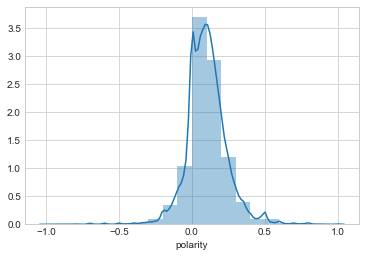

In [65]:
sns.distplot(news_eng['polarity'],bins=20)

#### Highly positive sentiment

In [217]:
pos_news = news_eng[['text_clean', 'polarity', 'subjectivity']][news_eng['polarity'] > 0.45]
pos_news.shape

(702, 3)

In [218]:
pos_news['text_clean'][42]

'There will be a memorial service scheduled for a later date  Create An Online Memorial For Idella R  Graelish  The beautiful and interactive Eternal Tribute tells Idella s life story the way it deserves to be told in words   pictures and video    Create an online memorial to tell that story for generations to come  creating a permanent place for family and friends to honor the memory of your loved one  Select An Online Memorial Product '

#### Highly Negative sentiment

In [219]:
neg_news = news_eng[['text_clean', 'polarity', 'subjectivity']][news_eng['polarity'] < -0.1].head(5)
neg_news.head()

,text_clean,polarity,subjectivity
13,Ugh dh s flight to chicago redirected to STL no more flights SWA sucks in that regard,-0.275000,0.400000
49,Location Jimmy John s East Randolph Street Chicago IL United States Diarrhea Details I or...,-0.350000,0.366667
92,By Mark McDermott Sunday at pm Revolution This Crazt Winter campaign is collecting to hel...,-0.100000,0.455556
94,January at AM EST Serial stowaway arrested for th time after slipping past ai...,-0.158333,0.208333
101,Image not available Photos not available for this variation View previous BALTIMORE ORIOLES...,-0.141667,0.241667


#### Neutral sentiment

In [220]:
news_eng[['text_clean', 'polarity', 'subjectivity']][news_eng['polarity'] == 0].head(5)

,text_clean,polarity,subjectivity
22,p m Fox Sports WJR AM No Michigan State Spartans Big Ten visit Illi...,0.0,0.05
47,The Chicago War Bethany Kris Deathless Divided Mentiras y amor Así es como comienza una gu...,0.0,0.00
53,Eels Tickets Chicago,0.0,0.00
59,To leave comments you have to register or Why,0.0,0.00
63,Illinois drought could impact winter wheat crop NewsTalk,0.0,0.00


In [222]:
# Create a list to store the sentiments
sent_list = []

# For each row in the column,
for row in news_eng['polarity']:
    if row > 0.40:
        sent_list.append('Positive')
    elif row < -0.1:
        sent_list.append('Negative')
    else:
        sent_list.append('Neutral')

# Create a column from the list
news_eng['Sentiment_Label'] = sent_list

/Users/gaoweijie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [223]:
news_eng[['text_clean', 'polarity', 'subjectivity','Sentiment_Label']].head()

,text_clean,polarity,subjectivity,Sentiment_Label
0,Discussion in Midwest started by sportscrazed Jan sportscrazed Aspirant ...,0.271429,0.438095,Neutral
1,CHICAGO – Hundreds of ballet dancers between the ages of and have been auditioning in Chica...,0.167929,0.369949,Neutral
2,Chicago rapper Fredo Santana has reportedly died according to several of his friends and collab...,0.138571,0.381905,Neutral
3,E mail Police are searching for a year old man who went missing from the Rogers Park neighbo...,0.039286,0.238095,Neutral
4,Documentary about Miss Continental pageant set to debut in Chicago by Carrie Maxwell Windy City...,0.221555,0.524619,Neutral


In [224]:
news_eng['text_clean'][0]

'Discussion in   Midwest   started by sportscrazed    Jan            sportscrazed  Aspirant       Mar          Indiana Beer Trader Title going to a concert at Aragon Ballroom and a nice buzz sounds good prior  What should I take the time to stop at  MonDak Joe     Defender       Aug         Minnesota You need to post this in the  Great Lakes  forum  or have the posting moved there     MonDak Joe       Jan           toutman   Initiate       Oct          Illinois Hop Leaf is a half mile walk from the Berwyn red line stop  they re worth the walk  Otherwise Fat Cat is a decent bar to pre game with good beers right on the corner of Broadway and a block north of Lawrence'

Neutral     29135
Positive     6909
Negative     1729
dtype: int64


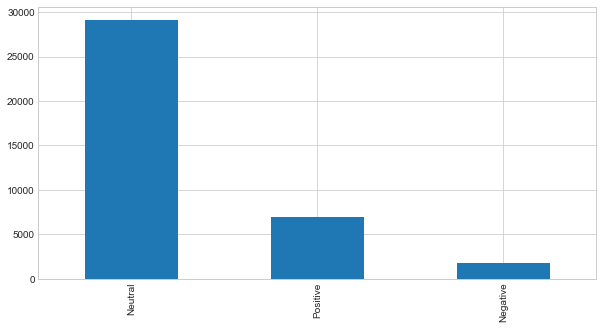

In [90]:
plt.figure().set_size_inches(10, 5)

CountSentiment = pd.value_counts(news_eng['Sentiment_Label'].values, sort=True)
print (CountSentiment)

#CountSentiment.plot.barh()
CountSentiment.plot.bar()

#### Generate word cloud

In [168]:
from wordcloud import WordCloud,STOPWORDS

In [225]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not len(word) <4
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Detect major topics

In [226]:
news_pos = news_eng[news_eng['Sentiment_Label'].isin(['Positive'])]
news_pos.head()

,text_clean,polarity,subjectivity,Sentiment_Label
30,SEARCH OTHER SOURCES Create An Online Memorial For Carol Jean James The beautiful and interacti...,0.475000,0.725000,Positive
33,SEARCH OTHER SOURCES Create An Online Memorial For Donald J Thompson The beautiful and interac...,0.475000,0.725000,Positive
42,There will be a memorial service scheduled for a later date Create An Online Memorial For Idell...,0.516667,0.600000,Positive
107,Can t keep it to myself need I I girl Baby think want the inside love I to you I feel me have In...,0.417460,0.534921,Positive
112,Los Angeles Jan IBNS Actress Kim Kardashian has named her new child as Chicago Kim unve...,0.466790,0.626489,Positive


In [227]:
text_pos = news_pos['text_clean']

In [228]:
news_neg = news_eng[news_eng['Sentiment_Label'].isin(['Negative'])]
news_neg.head()

,text_clean,polarity,subjectivity,Sentiment_Label
13,Ugh dh s flight to chicago redirected to STL no more flights SWA sucks in that regard,-0.275000,0.400000,Negative
49,Location Jimmy John s East Randolph Street Chicago IL United States Diarrhea Details I or...,-0.350000,0.366667,Negative
92,By Mark McDermott Sunday at pm Revolution This Crazt Winter campaign is collecting to hel...,-0.100000,0.455556,Negative
94,January at AM EST Serial stowaway arrested for th time after slipping past ai...,-0.158333,0.208333,Negative
101,Image not available Photos not available for this variation View previous BALTIMORE ORIOLES...,-0.141667,0.241667,Negative


In [212]:
text_neg = news_neg['text_clean']

In [229]:
# Create Positive and Negative TextBlob
post_TextBlobs=[]
for t in text_pos:
    post_TextBlobs.append(TextBlob(t))

neg_TextBlobs=[]
for t in text_neg:
    neg_TextBlobs.append(TextBlob(t))
    
blobs =post_TextBlobs+ neg_TextBlobs

### TF-idf

In [230]:
# Functions for tf-idf calculation
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [231]:
# Obtain the key words based on tf-idf
from collections import defaultdict
s = 0.35
topwords_in_article=[]
top_pos_wordsset=set()
for i, blob in enumerate(post_TextBlobs):
    topwords = defaultdict(float)
    for word in blob.words:
        tfidf_v= tfidf(word, blob, post_TextBlobs)
        if tfidf_v>s:
            topwords[word] = tfidf_v
            top_pos_wordsset.add(word)
    #if i>5:break
    #print(topwords)
    topwords_in_article.append(topwords)
top_pos_wordsset

{'ANAHEIM',
 'AT',
 'ATTRACTIONS',
 'Abe',
 'About',
 'Activist',
 'Admin',
 'Africa',
 'AgTalkers',
 'Agriculture',
 'Air',
 'America',
 'Analyst',
 'And',
 'Arabic',
 'Archimandrite',
 'Area',
 'Associates',
 'At',
 'Attorney',
 'Attractions',
 'Austin',
 'Auto',
 'Awesome',
 'BEANIE',
 'BEARS',
 'BEST',
 'BLACKHAWKS',
 'BLACKIE',
 'BRO',
 'BROCHURES',
 'Bannon',
 'Bargain',
 'Baseball',
 'Bavaria',
 'Bears',
 'Best',
 'Bets',
 'Better',
 'Birthday',
 'Blankets',
 'Boxscore',
 'Broadway',
 'Building',
 'Bulls',
 'Bunny',
 'CA',
 'CANYON',
 'CASINO',
 'CD',
 'CLICK',
 'CLUB',
 'COOKIES',
 'CP',
 'Cabaret',
 'Call',
 'Calories',
 'Cannabis',
 'Canyon',
 'Captain',
 'Career',
 'Carla',
 'Charboneau',
 'ChicagoNow',
 'CjVdkh',
 'Clark',
 'Clarkston',
 'Cleaning',
 'Colleges',
 'Condition',
 'Content',
 'Copyright',
 'Courses',
 'Craigslist',
 'DIS',
 'DOG',
 'DORN',
 'DUCKS',
 'Detroit',
 'Development',
 'Dies',
 'Divorce',
 'Dog',
 'Don',
 'Doug',
 'Dow',
 'Dr',
 'ENT',
 'ERIK',
 'Elbur

In [102]:
# get the top words from post_TextBlobs  based on tf-idf
s = 0.25
topwords_in_article=[]
top_neg_wordsset=set()
for i, blob in enumerate(neg_TextBlobs):
    topwords = defaultdict(float)
    for word in blob.words:
        tfidf_v= tfidf(word, blob, neg_TextBlobs)
        if tfidf_v>s:
            topwords[word] = tfidf_v
            top_neg_wordsset.add(word)
    #if i>5:break
    #print(topwords)
    topwords_in_article.append(topwords)

defaultdict(<class 'float'>, {'ugh': 0.3977736061837262, 'dh': 0.3977736061837262, 'flight': 0.2974943066402894, 'redirected': 0.3977736061837262, 'stl': 0.3438741513675994, 'flights': 0.3331493539091315, 'swa': 0.3977736061837262, 'sucks': 0.3570002426213765, 'regard': 0.3977736061837262})
defaultdict(<class 'float'>, {'jimmy': 0.25649141016327176})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'orioles': 0.2763776607397905, 'brooks': 0.2763776607397905, 'unscored': 0.2940065784836237})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'slipping': 0.25426744788060723, 'tsa': 0.25426744788060723})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'brand': 0.2638697445462348, 'games': 0.2922568629096687, 'joss': 0.2940065784836237, 'whedon': 0.2940065784836237, 'firefly': 0.2940065784836237, 'ages': 0.47907724666330237, 'queen': 0.2763776607397905})
defaultdict(<class 'float'>, {'campbell': 0.298081000866065, 'h

defaultdict(<class 'float'>, {'mechanicsburg': 1.124203956394075})
defaultdict(<class 'float'>, {'wayne': 0.9188222486285962})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'alton': 0.29780477495286367})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'maple': 0.2783743130118662})
defaultdict(<class 'float'>, {'host': 0.2643431961200948, 'toronto': 0.25311944667262215, 'maple': 0.31599246341887516, 'leafs': 0.3436046592981179})
defaultdict(<class 'float'>, {'ridgway': 0.9743100955415317})
defaultdict(<class 'float'>, {'ridgway': 0.8351229390355985})
defaultdict(<class 'float'>, {'mechanicsburg': 0.8351229390355985})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<c

defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'jimmy': 0.3755767077390765, 'howard': 0.34401722543343083, 'goal': 0.355027988278235, 'detroit': 0.3085574478395815, 'final': 0.31854044372352136, 'star': 0.2895786502872239, 'break': 0.3755767077390765})
defaultdict(<class 'float'>, {'orland': 1.114715043287155, 'park': 0.5644785032466262})
defaultdict(<class 'float'>, {'byron': 1.2235522130056447})
defaultdict(<class 'float'>, {'mlb': 0.33014893868764816, 'montreal': 0.3117325737374982, 'expos': 0.48301080750881037, 'bill': 0.3085574478395815, 'bonham': 0.48301080750881037, 'wp': 0.3935277383305698})
defaultdict(<class 'float'>, {'mlb': 0.308139009441805, 'san': 0.3007239671011233, 'diego': 0.3672925557751985, 'padres': 0.40460027497089335, 'willie': 0.3672925557751985, 'mccovey': 0.450810087008223, 'hr': 0.3505382605564714})
defaultdict(<class 'float'>, {'mlb': 0.33014893868764816, 'philadelphia': 0.31505

defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'buzzer': 0.2504500483379017})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'reds': 0.298081000866065})
defaultdict(<class 'float'>, {'what': 0.4591363533151457, 'dead': 0.5658092458561452, 'may': 0.43387803696061217, 'never': 0.48533395056888107, 'die': 0.9743100955415317})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'kim': 0.250384471826051, 'kardashian': 0.28900019640778096, 'kanye': 0.2783743130118662, 'celebrity': 0.3220072050058736, 'inspired': 0.28900019640778096, 'places': 0.26969233411691595})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'credit': 0.2678069913790827, 'oregon': 0.31611244554422824})
defaultdict(<class 'float'>, {'e': 0.44136233128948843, 'c': 0.26711989206807374})
defaultdict(<class 

defaultdict(<class 'float'>, {'banks': 0.2559931878096883, 'fisk': 0.3220072050058736, 'minoso': 0.3026993427150086, 'schoendienst': 0.3026993427150086})
defaultdict(<class 'float'>, {'minnie': 0.26486192487563254, 'minoso': 0.26486192487563254})
defaultdict(<class 'float'>, {'scratched': 0.25416785101083433, 'ernie': 0.2763776607397905})
defaultdict(<class 'float'>, {'councils': 0.3756750725068525, 'piece': 0.35314923316751, 'effort': 0.29865871911130304, 'cut': 0.2862618551494025, 'population': 0.3060771298126654})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'opioid': 0.311230980746841, 'hotline': 0.32598390753924006})
defaultdict(<class 'float'>, {'debt': 0.26879284720017277})
defaultdict(<class 'float'>, {'compliant': 0.2504500483379017})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'renewed': 0.48301080750881037, 'cdl': 0.4540490140725129, 'birth': 0.41756146951779927, 'certificate': 0.41756146951779927})
defaul

defaultdict(<class 'float'>, {'mni': 0.30737051386924297, 'indicators': 0.30737051386924297})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'quarter': 0.27613287977196055, 'exceptional': 0.3756750725068525, 'performance': 0.33716689580907777, 'industrial': 0.2862618551494025, 'perfect': 0.35314923316751, 'valuation': 0.35314923316751, 'expensive': 0.32477003184717723})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'marion': 0.3653662858280744})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'tool': 0.5018436471327774, 'wo': 0.5338540504044746, 'itw': 0.3345624314218516})
defaultdict(<class 'float'>, {'geneseo': 0.31942126971386314, 'postcard': 0.3345624314218516, 'hand': 0.2615995703102784, 'colored': 0.31942126971386314})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 

defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'too': 1.022000663924204, 'cold': 0.866578609779754, 'rolling': 1.5891715492537952, 'over': 0.6045864708174153})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'milwaukee': 0.3072546836010565})
defaultdict(<class 'float'>, {'chipotle': 0.3345624314218516})
defaultdict(<class 'float'>, {'northerly': 0.2940065784836237, 'pit': 0.2940065784836237})
defaultdict(<class 'float'>, {'radford': 0.3169758424276568})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'variable': 1.5891715492537952, 'but': 0.5520686033807011, 'typically': 1.51725103114085, 'kw': 1.5891715492537952})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'broken': 0.25738679622219757, 'rapper': 0.2829398391580765, 'rico': 0.3345624314218516, 'crew': 0.2767407320182669, 'jump': 0.31942126971386314, 'dissing': 0.35590270026964976, 'friend': 0.253486376635

defaultdict(<class 'float'>, {'lynwood': 0.35314923316751})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'credit': 0.2826336760229074})
defaultdict(<class 'float'>, {'pontoon': 0.26572093514769046})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'we': 0.2550023707244861})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'approximately': 1.58241609486036, 'carjackings': 2.0230013748544664})
defaultdict(<class 'float'>, {'mcdonald': 0.27586382384379093})
defaultdict(<class 'float'>, {'dae': 0.8452689131404182, 'prophet': 0.7945857746268976, 'submitted': 0.6212989794869113, 'u': 0.3810724048023797, 'alien': 0.758625515570425, 'link': 0.44801218434692497, 'comments': 0.4101139019734567})
defaultdict(<class 'float'>, {'miami': 0.550907030993354, 'marlins': 0.3739227174714812})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defa

defaultdict(<class 'float'>, {'acre': 0.28900019640778096, 'taxes': 0.2783743130118662, 'plow': 0.28900019640778096})
defaultdict(<class 'float'>, {'galatia': 0.3085934300625458})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'sesser': 0.3220072050058736, 'hunt': 0.5393846682338319, 'cancelled': 0.6053986854300172, 'travis': 0.3026993427150086, 'carlock': 0.3220072050058736, 'tue': 0.28900019640778096, 'inconvenience': 0.3026993427150086})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'salt': 0.25416785101083433})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'bridge': 0.2821355266281781, 'iron': 0.31014559292327626, 'nv': 0.26008274250474406, 'methanol': 0.26008274250474406})

defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'credit': 0.33633407446725977, 'springfield': 0.29690931931626074})
defaultdict(<class 'float'>, {'credit': 0.2745584281365386, 'wyanet': 0.3131711021383495})
defaultdict(<class 'float'>, {'credit': 0.2669318051327459, 'wyanet': 0.40596253980897157})
defaultdict(<class 'float'>, {'credit': 0.32713344629034385, 'springfield': 0.33691837652909024})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'ht': 0.472026009020121})
defaultdict(<class 'float'>, {'detroit': 0.2699877668596338, 'travel': 0.2756735029974917, 'chaos': 0.4226344565702091, 'usa': 0.255500165981051})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'dance': 0.26486192487563254})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'pension': 0.27546941683139886})
defaultdict(<class 'float'>, {'carter': 0.25416785101083433, 'harrison': 0.2638697445462348, 'portrait': 0.2940065784836237})
def

defaultdict(<class 'float'>, {'snow': 0.28416141307613296})
defaultdict(<class 'float'>, {'mirror': 0.2704860522049338, 'sock': 0.2704860522049338, 'leather': 0.25426744788060723, 'keychain': 0.2704860522049338, 'strips': 0.2704860522049338})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'party': 0.3085574478395815, 'affiliation': 0.48301080750881037})
defaultdict(<class 'float'>, {'blacklivesmatter…except': 0.6147410277384859, 'dead': 0.3086232250124429, 'wounded': 0.4378401050970938, 'citywide': 0.6147410277384859, 'shootings': 0.3851293328013718, 'since': 0.28405137685426907, 'friday': 0.27938835009176444, 'evening': 0.3748267250461897})
defaultdict(<class 'float'>, {'hendricks': 0.3026993427150086, 'bobblehead': 0.2783743130118662})
defaultdict(<class 'float'>, {'darvish': 0.26008274250474406})
defaultdict(<class 'float'>, {'filthy': 0.2817563043801394, 'slime': 0.2817563043801394, 'ridden': 0.26486192487563254, 'ilk': 0.2817563043801394, 'republickers': 0.28175630

defaultdict(<class 'float'>, {'transit': 0.3539711885284522, 'authority': 0.3793127577852125})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'indians': 0.250426742573999})
defaultdict(<class 'float'>, {'small': 0.3296960990176541, 'pack': 0.6147410277384859, 'sale': 0.4009796407236243, 'shipped': 0.46842849024447686, 'local': 0.34240173014266856, 'pick': 0.43156802587100734})
defaultdict(<class 'float'>, {'indians': 0.26235182555371317})
defaultdict(<class 'float'>, {'twins': 0.27546941683139886})
defaultdict(<class 'float'>, {'oakland': 0.27613287977196055, 'athletics': 0.32477003184717723})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'addison': 0.35362701198243435, 'trail': 0.3703895894323806, 'quarterfinal': 0.2662264293355648})
defaultdict(<class 'float'>, {'balimore': 0.3220072050058736, 'ravens': 0.2783743130118662, 'unused': 0.2783743130118662, 'stubs': 0.2559931878096883})
defaultdict(<class 'float'>, {'jose':

defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'carla': 0.3145186653545742})
defaultdict(<class 'float'>, {'doug': 0.2831769508227618, 'dascenzo': 0.3381075652561673, 'autograph': 0.29229302866245954})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'indians': 0.27546941683139886, 'mint': 0.31783430985075906})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'indiana': 0.33136165442575105})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'email': 0.32693981677892897, 'addresses': 0.25416785101083433})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defa

defaultdict(<class 'float'>, {'patton': 0.2528751718568083, 'funeral': 0.26756895311489065})
defaultdict(<class 'float'>, {'search': 0.5399755337192677, 'other': 0.282792704349135, 'sources': 0.5346555819169181, 'mark': 0.9822344902667822, 'j': 0.48054757162988326, 'lovell': 0.8452689131404182})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'ya': 0.30345020622817004})
defaultdict(<class 'float'>, {'grandpa': 0.2817563043801394, 'rossy': 0.2817563043801394, 'crunch': 0.2817563043801394, 'cereal': 0.26486192487563254, 'dancing': 0.2817563043801394})
defaultdict(<class 'float'>, {'journey': 0.3653662858280744, 'def': 0.3793127577852125, 'leppard': 0.3972928873134488})
defaultdict(<class 'float'>, {'rauner': 0.27569980575195385, 'owes': 0.26008274250474406})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'contreras': 0.28900019640778096, 'bobbleh': 0.322007205

defaultdict(<class 'float'>, {'yeah': 0.32477003184717723, 'really': 0.2601505424135283, 'mobile': 0.27613287977196055, 'worse': 0.2809668451602733, 'position': 0.27613287977196055})
defaultdict(<class 'float'>, {'millers': 0.2817563043801394, 'blend': 0.26486192487563254, 'coffee': 0.5635126087602788, 'lb': 0.2817563043801394, 'tin': 0.2817563043801394})
defaultdict(<class 'float'>, {})
defaultdict(<class 'float'>, {'watched': 0.3602084433418084, 'kill': 0.28253273521169114, 'rewatched': 0.4334712375079067})
defaultdict(<class 'float'>, {'sebastian': 0.30737051386924297, 'maniscalco': 0.30737051386924297, 'loge': 0.30737051386924297, 'aa': 0.28894028168250824})
defaultdict(<class 'float'>, {'brewers': 0.2615995703102784})
defaultdict(<class 'float'>, {'thousands': 0.3890310163757631, 'rally': 0.4496815825576301, 'gun': 0.2773192987671717, 'control': 0.29367017891976194, 'wake': 0.39636256866840347, 'deadly': 0.3890310163757631, 'florida': 0.3602084433418084})
defaultdict(<class 'float

{'srixdkr',
 'davis',
 'queef',
 'dieterich',
 'f',
 'destroying',
 'aislie',
 'rutgers',
 'pit',
 'hornets',
 'nutcwev',
 'calendars',
 'hall',
 'group',
 'button',
 'wendy',
 'ale',
 'canon',
 'take',
 'crypto',
 'onarga',
 'pitt',
 'www',
 'hot',
 'roger',
 'youtu',
 'gorilla',
 'affiliation',
 'false',
 'south',
 'railroad',
 'baez',
 'location',
 'stub',
 'second',
 'btc',
 'schedl',
 'eve',
 'compliant',
 'pavilion',
 'indefinitely',
 'township',
 'maniscalco',
 'brand',
 'certificate',
 'contract',
 'j',
 'style',
 'iupui',
 'wrench',
 'dixon',
 'glade',
 'dangerous',
 'gathers',
 'championship',
 'autographed',
 'debt',
 'hayes',
 'butterfly',
 'flu',
 'hof',
 'demonstrate',
 'ugh',
 'happ',
 'control',
 'job',
 'ubi',
 'krampus',
 'turtles',
 'milwaukee',
 'perfect',
 'dead',
 'queen',
 'https',
 'frigid',
 'richland',
 'bnw',
 'elton',
 'meter',
 'civic',
 'mage',
 'infant',
 'rain',
 'gun',
 'dried',
 'rawstory',
 'cme',
 'ontario',
 'bostic',
 'statue',
 'riverbend',
 'hq',

#### generate wordcloud based on key words

In [105]:
#Visualization based on Sentiment label
from wordcloud import WordCloud, STOPWORDS

In [195]:
from os import path
from PIL import Image
import os

def wordcloud_draw(data, color = 'black'):
    
    #d = os.getcwd()
    
    words = ' '.join(data)
    
    #alice_mask = np.array(Image.open(path.join(d, "download.png")))
    
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,#mask=alice_mask,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

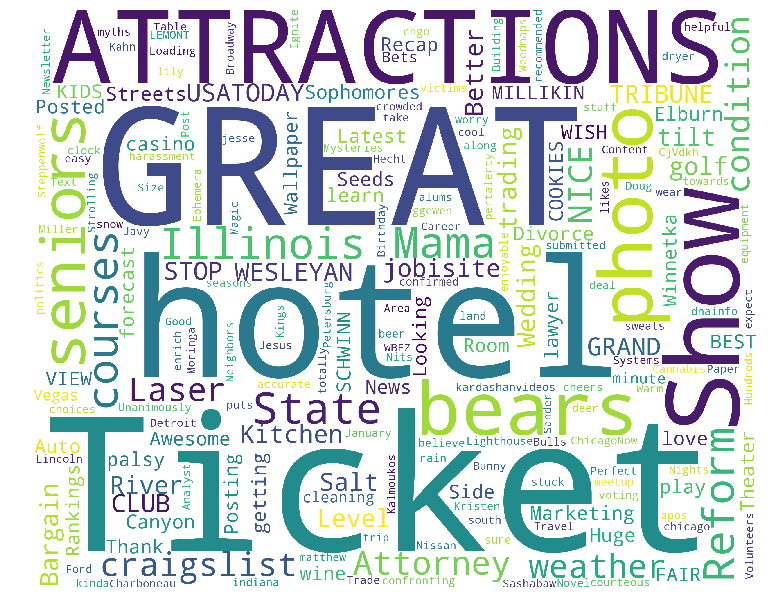

In [232]:
wordcloud_draw(top_pos_wordsset,'white')

In [1]:
wordcloud_draw(top_neg_wordsset,'black')

### Topic Modelling

In [110]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [123]:
def clean_text2(text,isalpha = True):
    # tokenize words
    text_words = nltk.word_tokenize(text)
    # keep words with length >2
    words = [word for word in text_words if len(word) > 2]
    if isalpha is True:
        words = [word for word in words if word.isalpha()]
    # remove Stop words
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stopwords]
    # Lemmation 
    wnl = nltk.WordNetLemmatizer()
    words = [wnl.lemmatize(t) for t in words]
    return " ".join(words)

In [124]:
text_pos_clean = [clean_text2(doc).split() for doc in text_pos]

In [125]:
len(text_pos_clean)

6909

In [126]:
text_neg_clean = [clean(doc).split() for doc in text_neg]

In [127]:
len(text_neg_clean)

1729

In [128]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(text_pos_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
# Using doc2bow which is bag of words
%time doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_pos_clean]
Lsa = gensim.models.lsimodel.LsiModel
%time lsi = Lsa(doc_term_matrix, id2word=dictionary, num_topics=25)

lsi.print_topics(25)

CPU times: user 1.47 s, sys: 151 ms, total: 1.62 s
Wall time: 1.73 s
CPU times: user 3.82 s, sys: 278 ms, total: 4.1 s
Wall time: 2.9 s


[(0,
  '0.607*"slot" + 0.473*"machine" + 0.390*"casino" + 0.234*"online" + 0.207*"illinois" + 0.205*"manual" + 0.204*"rockford" + 0.204*"konami" + 0.098*"bonus" + 0.059*"deposit"'),
 (1,
  '0.386*"width" + 0.340*"class" + 0.282*"style" + 0.245*"table" + 0.229*"editable" + 0.216*"border" + 0.198*"chicago" + 0.169*"color" + 0.169*"top" + 0.156*"padding"'),
 (2,
  '0.504*"chicago" + -0.170*"width" + 0.151*"show" + 0.139*"one" + 0.135*"year" + 0.129*"best" + -0.124*"class" + 0.117*"new" + -0.116*"style" + 0.115*"deloitte"'),
 (3,
  '0.499*"chicago" + -0.331*"deloitte" + 0.218*"show" + -0.213*"business" + -0.189*"client" + -0.158*"experience" + 0.150*"auto" + -0.138*"team" + -0.129*"work" + -0.129*"help"'),
 (4,
  '0.343*"jeremy" + 0.342*"dwyer" + 0.342*"lindgren" + 0.312*"boeing" + 0.250*"special" + 0.229*"today" + 0.223*"usa" + 0.218*"flight" + -0.207*"chicago" + 0.206*"fullscreen"'),
 (5,
  '-0.297*"show" + -0.270*"chicago" + -0.268*"deloitte" + -0.247*"auto" + 0.239*"best" + 0.167*"said

In [131]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(text_neg_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
# Using doc2bow which is bag of words
%time doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_neg_clean]
Lsa = gensim.models.lsimodel.LsiModel
%time lsi = Lsa(doc_term_matrix, id2word=dictionary, num_topics=25)

lsi.print_topics(25)

CPU times: user 175 ms, sys: 1.06 ms, total: 176 ms
Wall time: 195 ms
CPU times: user 689 ms, sys: 51.8 ms, total: 741 ms
Wall time: 450 ms


[(0,
  '0.451*"fake" + 0.447*"driver" + 0.447*"license" + 0.445*"buy" + 0.442*"false" + 0.012*"united" + 0.009*"quality" + 0.009*"cc" + 0.009*"buysellfakepassport" + 0.007*"support"'),
 (1,
  '0.659*"credit" + 0.374*"illinois" + 0.297*"repair" + 0.167*"com" + 0.158*"email" + 0.158*"report" + 0.155*"bad" + 0.151*"free" + 0.106*"blogtrottr" + 0.104*"mail"'),
 (2,
  '-0.386*"g" + -0.349*"season" + -0.323*"state" + -0.314*"f" + -0.269*"illinois" + -0.220*"indefinitely" + -0.196*"game" + 0.177*"credit" + -0.147*"michigan" + -0.135*"v"'),
 (3,
  '0.411*"g" + 0.355*"season" + 0.333*"f" + 0.234*"indefinitely" + -0.232*"game" + -0.228*"illinois" + -0.168*"guard" + -0.142*"michigan" + -0.139*"chicago" + -0.134*"champaign"'),
 (4,
  '-0.548*"chicago" + -0.248*"police" + -0.245*"said" + 0.170*"illinois" + 0.160*"state" + -0.148*"north" + 0.144*"michigan" + -0.134*"smith" + -0.133*"pelly" + -0.120*"fan"'),
 (5,
  '-0.302*"state" + 0.241*"bobby" + 0.240*"goddin" + 0.240*"indystar" + 0.231*"indiana" 

#### Applying LDA to negative news articles

In [118]:
# Creating the term dictionary of the courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(text_neg_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
%time doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_neg_clean]

CPU times: user 151 ms, sys: 5.66 ms, total: 156 ms
Wall time: 169 ms


#### 3 topic model

In [119]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
numtopics = 3

# Running and Trainign LDA model on the document term matrix.
%time ldamodel = Lda(doc_term_matrix, num_topics=numtopics, id2word = dictionary, passes=50)

CPU times: user 7min 32s, sys: 5.04 s, total: 7min 37s
Wall time: 5min 39s


In [120]:
print(*ldamodel.print_topics(num_topics=numtopics, num_words=3), sep='\n\n')

(0, '0.014*"chicago" + 0.011*"police" + 0.011*"illinois"')

(1, '0.094*"credit" + 0.049*"illinois" + 0.041*"repair"')

(2, '0.025*"chicago" + 0.014*"game" + 0.012*"illinois"')


In [121]:
print(*ldamodel.print_topics(num_topics=numtopics, num_words=5), sep='\n\n')

(0, '0.014*"chicago" + 0.011*"police" + 0.011*"illinois" + 0.009*"said" + 0.007*"year"')

(1, '0.094*"credit" + 0.049*"illinois" + 0.041*"repair" + 0.023*"bad" + 0.022*"report"')

(2, '0.025*"chicago" + 0.014*"game" + 0.012*"illinois" + 0.011*"available" + 0.009*"photo"')


In [122]:
print(*ldamodel.print_topics(num_topics=numtopics, num_words=7), sep='\n\n')

(0, '0.014*"chicago" + 0.011*"police" + 0.011*"illinois" + 0.009*"said" + 0.007*"year" + 0.006*"officer" + 0.005*"state"')

(1, '0.094*"credit" + 0.049*"illinois" + 0.041*"repair" + 0.023*"bad" + 0.022*"report" + 0.021*"free" + 0.020*"com"')

(2, '0.025*"chicago" + 0.014*"game" + 0.012*"illinois" + 0.011*"available" + 0.009*"photo" + 0.008*"smith" + 0.008*"image"')


#### 5 topic model

In [47]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
numtopics = 5

# Running and Trainign LDA model on the document term matrix.
%time ldamodel = Lda(doc_term_matrix, num_topics=numtopics, id2word = dictionary, passes=50)

CPU times: user 1h 12min 7s, sys: 50 s, total: 1h 12min 57s
Wall time: 45min 54s


In [48]:
print(*ldamodel.print_topics(num_topics=numtopics, num_words=3), sep='\n\n')

(0, '0.019*"chicago" + 0.010*"illinois" + 0.009*"police"')

(1, '0.011*"said" + 0.006*"year" + 0.005*"team"')

(2, '0.008*"illinois" + 0.006*"service" + 0.006*"business"')

(3, '0.020*"n" + 0.012*"chicago" + 0.009*"show"')

(4, '0.018*"chicago" + 0.004*"new" + 0.004*"one"')


In [49]:
print(*ldamodel.print_topics(num_topics=numtopics, num_words=5), sep='\n\n')

(0, '0.019*"chicago" + 0.010*"illinois" + 0.009*"police" + 0.008*"2018" + 0.008*"state"')

(1, '0.011*"said" + 0.006*"year" + 0.005*"team" + 0.005*"season" + 0.004*"would"')

(2, '0.008*"illinois" + 0.006*"service" + 0.006*"business" + 0.006*"work" + 0.005*"experience"')

(3, '0.020*"n" + 0.012*"chicago" + 0.009*"show" + 0.009*"2018" + 0.008*"auto"')

(4, '0.018*"chicago" + 0.004*"new" + 0.004*"one" + 0.004*"city" + 0.004*"like"')


In [50]:
print(*ldamodel.print_topics(num_topics=numtopics, num_words=7), sep='\n\n')

(0, '0.019*"chicago" + 0.010*"illinois" + 0.009*"police" + 0.008*"2018" + 0.008*"state" + 0.007*"bauer" + 0.006*"school"')

(1, '0.011*"said" + 0.006*"year" + 0.005*"team" + 0.005*"season" + 0.004*"would" + 0.004*"one" + 0.004*"chicago"')

(2, '0.008*"illinois" + 0.006*"service" + 0.006*"business" + 0.006*"work" + 0.005*"experience" + 0.005*"chicago" + 0.004*"job"')

(3, '0.020*"n" + 0.012*"chicago" + 0.009*"show" + 0.009*"2018" + 0.008*"auto" + 0.008*"new" + 0.007*"first"')

(4, '0.018*"chicago" + 0.004*"new" + 0.004*"one" + 0.004*"city" + 0.004*"like" + 0.003*"time" + 0.003*"year"')


#### LDA positive

In [129]:
# Creating the term dictionary of the courpus, where every unique term is assigned an index. 
pos_dictionary = corpora.Dictionary(pos_news_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
%time pos_doc_term_matrix = [pos_dictionary.doc2bow(doc) for doc in pos_news_clean]

CPU times: user 13.9 ms, sys: 862 µs, total: 14.8 ms
Wall time: 14.3 ms


#### 3 topic model

In [98]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
numtopics = 3

# Running and Trainign LDA model on the document term matrix.
%time pos_ldamodel = Lda(pos_doc_term_matrix, num_topics=numtopics, id2word = pos_dictionary, passes=50)

CPU times: user 40 s, sys: 183 ms, total: 40.2 s
Wall time: 40.6 s


In [99]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=3), sep='\n\n')

(0, '0.025*"chicago" + 0.013*"best" + 0.010*"great"')

(1, '0.027*"chicago" + 0.016*"item" + 0.013*"memorial"')

(2, '0.012*"chicago" + 0.012*"best" + 0.007*"illinois"')


In [100]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=5), sep='\n\n')

(0, '0.025*"chicago" + 0.013*"best" + 0.010*"great" + 0.009*"awesome" + 0.007*"2018"')

(1, '0.027*"chicago" + 0.016*"item" + 0.013*"memorial" + 0.013*"online" + 0.009*"story"')

(2, '0.012*"chicago" + 0.012*"best" + 0.007*"illinois" + 0.005*"service" + 0.005*"2018"')


In [101]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=7), sep='\n\n')

(0, '0.025*"chicago" + 0.013*"best" + 0.010*"great" + 0.009*"awesome" + 0.007*"2018" + 0.005*"photo" + 0.005*"good"')

(1, '0.027*"chicago" + 0.016*"item" + 0.013*"memorial" + 0.013*"online" + 0.009*"story" + 0.009*"word" + 0.009*"tell"')

(2, '0.012*"chicago" + 0.012*"best" + 0.007*"illinois" + 0.005*"service" + 0.005*"2018" + 0.004*"team" + 0.004*"http"')


In [102]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=10), sep='\n\n')

(0, '0.025*"chicago" + 0.013*"best" + 0.010*"great" + 0.009*"awesome" + 0.007*"2018" + 0.005*"photo" + 0.005*"good" + 0.004*"post" + 0.004*"fire" + 0.004*"illinois"')

(1, '0.027*"chicago" + 0.016*"item" + 0.013*"memorial" + 0.013*"online" + 0.009*"story" + 0.009*"word" + 0.009*"tell" + 0.008*"create" + 0.008*"file" + 0.008*"preview"')

(2, '0.012*"chicago" + 0.012*"best" + 0.007*"illinois" + 0.005*"service" + 0.005*"2018" + 0.004*"team" + 0.004*"http" + 0.003*"good" + 0.003*"know" + 0.003*"builder"')


#### 5 topic model

In [103]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
numtopics = 5

# Running and Trainign LDA model on the document term matrix.
%time pos_ldamodel = Lda(pos_doc_term_matrix, num_topics=numtopics, id2word = pos_dictionary, passes=50)

CPU times: user 38.9 s, sys: 133 ms, total: 39.1 s
Wall time: 39.2 s


In [104]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=3), sep='\n\n')

(0, '0.011*"best" + 0.009*"chicago" + 0.009*"illinois"')

(1, '0.026*"chicago" + 0.016*"awesome" + 0.012*"great"')

(2, '0.029*"chicago" + 0.010*"best" + 0.008*"illinois"')

(3, '0.029*"chicago" + 0.024*"item" + 0.012*"preview"')

(4, '0.023*"memorial" + 0.021*"online" + 0.016*"chicago"')


In [105]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=5), sep='\n\n')

(0, '0.011*"best" + 0.009*"chicago" + 0.009*"illinois" + 0.006*"good" + 0.005*"service"')

(1, '0.026*"chicago" + 0.016*"awesome" + 0.012*"great" + 0.008*"best" + 0.008*"2018"')

(2, '0.029*"chicago" + 0.010*"best" + 0.008*"illinois" + 0.008*"facebook" + 0.005*"post"')

(3, '0.029*"chicago" + 0.024*"item" + 0.012*"preview" + 0.012*"file" + 0.011*"best"')

(4, '0.023*"memorial" + 0.021*"online" + 0.016*"chicago" + 0.014*"tell" + 0.014*"story"')


In [106]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=7), sep='\n\n')

(0, '0.011*"best" + 0.009*"chicago" + 0.009*"illinois" + 0.006*"good" + 0.005*"service" + 0.005*"builder" + 0.005*"location"')

(1, '0.026*"chicago" + 0.016*"awesome" + 0.012*"great" + 0.008*"best" + 0.008*"2018" + 0.007*"photo" + 0.006*"fire"')

(2, '0.029*"chicago" + 0.010*"best" + 0.008*"illinois" + 0.008*"facebook" + 0.005*"post" + 0.005*"state" + 0.005*"2018"')

(3, '0.029*"chicago" + 0.024*"item" + 0.012*"preview" + 0.012*"file" + 0.011*"best" + 0.008*"good" + 0.008*"download"')

(4, '0.023*"memorial" + 0.021*"online" + 0.016*"chicago" + 0.014*"tell" + 0.014*"story" + 0.014*"create" + 0.009*"beautiful"')


In [107]:
print(*pos_ldamodel.print_topics(num_topics=numtopics, num_words=10), sep='\n\n')

(0, '0.011*"best" + 0.009*"chicago" + 0.009*"illinois" + 0.006*"good" + 0.005*"service" + 0.005*"builder" + 0.005*"location" + 0.004*"home" + 0.004*"february" + 0.004*"http"')

(1, '0.026*"chicago" + 0.016*"awesome" + 0.012*"great" + 0.008*"best" + 0.008*"2018" + 0.007*"photo" + 0.006*"fire" + 0.005*"music" + 0.005*"wedding" + 0.004*"sale"')

(2, '0.029*"chicago" + 0.010*"best" + 0.008*"illinois" + 0.008*"facebook" + 0.005*"post" + 0.005*"state" + 0.005*"2018" + 0.005*"great" + 0.005*"show" + 0.005*"good"')

(3, '0.029*"chicago" + 0.024*"item" + 0.012*"preview" + 0.012*"file" + 0.011*"best" + 0.008*"good" + 0.008*"download" + 0.007*"available" + 0.007*"company" + 0.007*"word"')

(4, '0.023*"memorial" + 0.021*"online" + 0.016*"chicago" + 0.014*"tell" + 0.014*"story" + 0.014*"create" + 0.009*"beautiful" + 0.008*"family" + 0.008*"friend" + 0.008*"picture"')


### Name Entity Recognition for positive news articles

In [244]:
top_pos_wordsset = list(top_pos_wordsset)

In [233]:
df_pos = pd.DataFrame(text_pos)

In [234]:
df_pos = df_pos.reset_index(drop=True)

In [235]:
def entity_counter(x):
    tmp_dict = {'ORGANIZATION':set(), 'PERSON':set()}
    for sent in nltk.sent_tokenize(x):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False):
            if hasattr(chunk, 'label') and chunk.label() in ['ORGANIZATION','PERSON']:
                tmp_dict[chunk.label()].add(' '.join(c[0] for c in chunk))
    return len(tmp_dict['ORGANIZATION']),len(tmp_dict['PERSON'])

In [236]:
df_pos['combined'] = df_pos['text_clean'].map(entity_counter)
df_pos['organization'] = df_pos['combined'].map(lambda x: x[0])
df_pos['person'] = df_pos['combined'].map(lambda x: x[1])

In [237]:
df_final = df_pos.drop('combined',axis=1)
df_final

,text_clean,organization,person
0,SEARCH OTHER SOURCES Create An Online Memorial For Carol Jean James The beautiful and interacti...,1,4
1,SEARCH OTHER SOURCES Create An Online Memorial For Donald J Thompson The beautiful and interac...,1,4
2,There will be a memorial service scheduled for a later date Create An Online Memorial For Idell...,1,4
3,Can t keep it to myself need I I girl Baby think want the inside love I to you I feel me have In...,1,1
4,Los Angeles Jan IBNS Actress Kim Kardashian has named her new child as Chicago Kim unve...,4,8
5,Sun pm Tim Mitchell Photo by Darrell Hoemann The News Gazette Samantha Has...,5,4
6,Funny or Die Video f c d Face Mask Rap a Chicago Winter Struggle Item Preview There Is N...,2,1
7,About Laser Level Advisor Established October We here at Laser Level Advisor provides all ...,2,1
8,google map I have a indigi tablet and phone new still in the package everything s included...,0,0
9,google map I have WWE wrestling figures in good condition I will take for allhave h...,1,0


In [249]:
df_business = df_final[df_final['organization'] > 15]

In [239]:
df_people = df_final[df_final['person'] > 10]

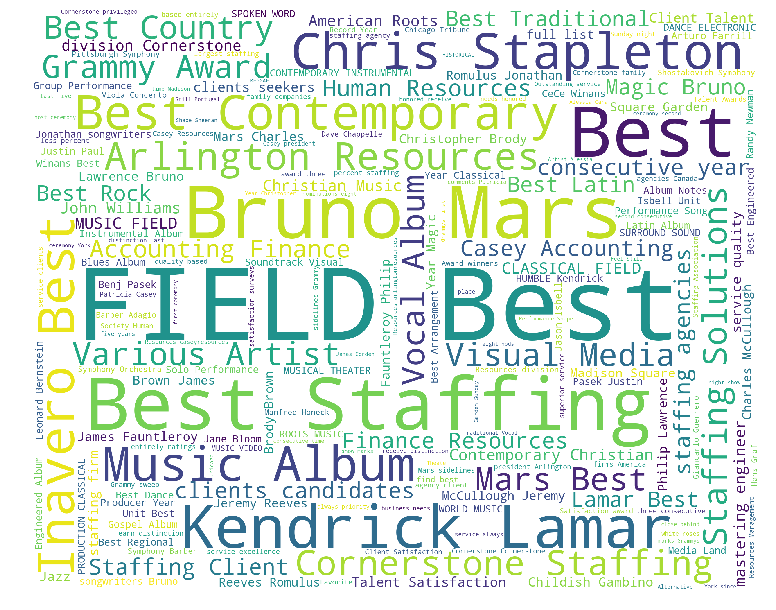

In [250]:
wordcloud_draw(df_business['text_clean'],'white')